In [1]:

from jmetal.operator import PolynomialMutation, SBXCrossover
from jmetal.util.solution import get_non_dominated_solutions
from jmetal.util.termination_criterion import StoppingByEvaluations
from modnsgaii import S_NSGAII

from jmetal.problem import ZDT1

problem = ZDT1()

max_evaluations = 50000
algorithm = S_NSGAII(
        problem=problem,
        population_size=100,
        offspring_population_size=100,
        mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables(), distribution_index=20),
        crossover=SBXCrossover(probability=1.0, distribution_index=20),
        termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations),
        batch_sample_percentaje = 0.5,
)

algorithm.run()

Train cycle:  1
Training algorithm 
duplicates rows:  16307
MSE evaluation train:  0.010402314233580377
Number of surrogate evaluation:  250
Total surrogate evaluation:  25000
Total evaluation:  50000


In [2]:
front = get_non_dominated_solutions(algorithm.get_result())


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
referenceFront = np.loadtxt("resources/reference_front/ZDT1.pf", delimiter=' ')
referenceFront = referenceFront[referenceFront[:, 0].argsort()]

In [5]:
objectives = [solution.objectives for solution in front]

x = [_[0] for _ in objectives]
y = [_[1] for _ in objectives]

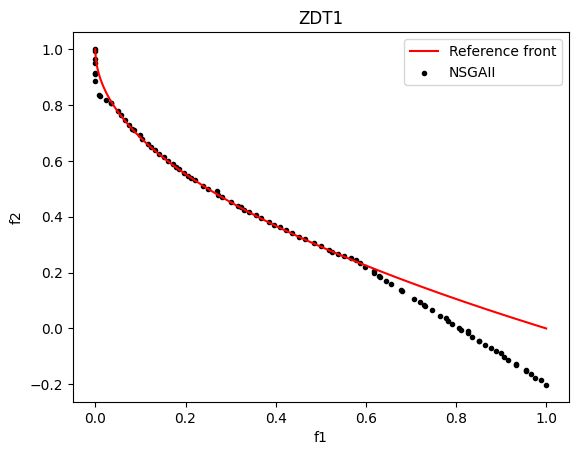

In [6]:
plt.plot(referenceFront[:,0], referenceFront[:,1], color="red")

plt.scatter(x, y, color="black", marker = '.')

plt.xlabel("f1")
plt.ylabel("f2")
plt.title(problem.name())
plt.legend(["Reference front","NSGAII"])

In [7]:
from jmetal.algorithm.multiobjective.nsgaii import NSGAII

problem = ZDT1()

max_evaluations = 50000
algorithm = NSGAII(
        problem=problem,
        population_size=100,
        offspring_population_size=100,
        mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables(), distribution_index=20),
        crossover=SBXCrossover(probability=1.0, distribution_index=20),
        termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations),
)

algorithm.run()

[2024-05-09 08:41:35,853] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-09 08:41:35,855] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-09 08:41:35,855] [jmetal.core.algorithm] [DEBUG] Initializing progress...


[2024-05-09 08:41:35,855] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-09 08:41:46,112] [jmetal.core.algorithm] [DEBUG] Finished!


In [8]:
front = get_non_dominated_solutions(algorithm.get_result())

In [9]:
objectives = [solution.objectives for solution in front]

x = [_[0] for _ in objectives]
y = [_[1] for _ in objectives]

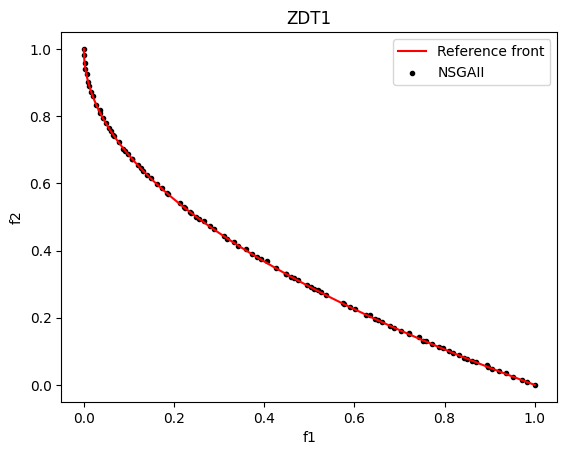

In [10]:
plt.plot(referenceFront[:,0], referenceFront[:,1], color="red")
plt.scatter(x, y, color="black", marker = '.')

plt.xlabel("f1")
plt.ylabel("f2")
plt.title(problem.name())
plt.legend(["Reference front","NSGAII"])